# Dataset Iris

O dataset Iris é um dos conjuntos de dados mais famosos na área de aprendizado de máquina e estatística. Ele contém informações sobre três diferentes espécies de íris (flores), e a tarefa é classificar essas espécies com base em medições de suas pétalas e sépalas.

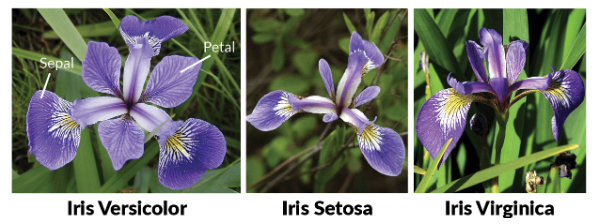

### Estrutura do Dataset
O dataset contém 150 amostras, distribuídas igualmente entre três espécies de íris:

- Setosa (target=0)
- Versicolor (target=1)
- Virginica (target=2)

Cada amostra tem 4 variáveis de entrada (ou características):

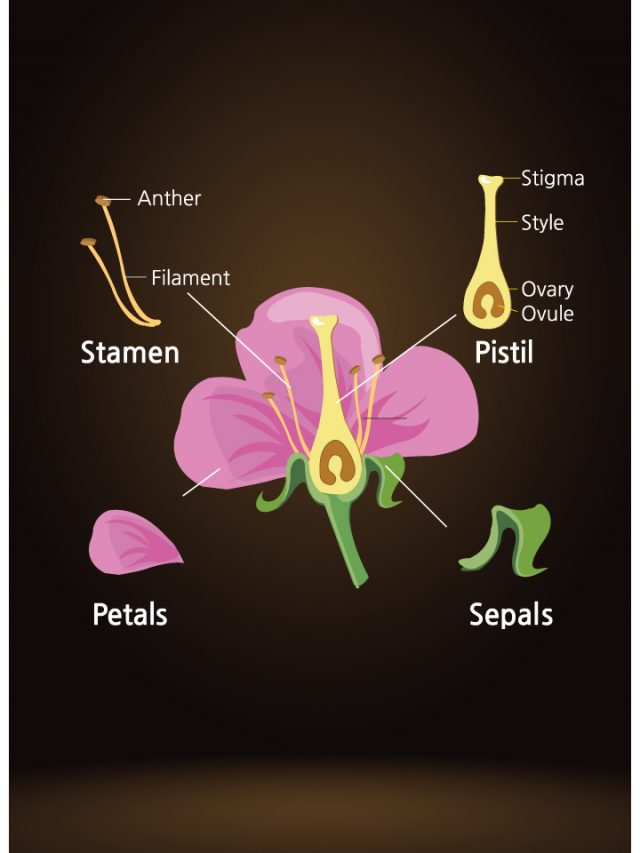

- sepal length (cm) = Comprimento da sépala em centímetros.
- sepal width (cm) = Largura da sépala em centímetros.
- petal length (cm) = Comprimento da pétala em centímetros.
- petal width (cm) = Largura da pétala em centímetros.

A variável alvo (target) é a espécie da íris, codificada como:

- 0: Setosa
- 1: Versicolor
- 2: Virginica

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

O carregamento do dataset Iris envolve vários passos relacionados ao pré-processamento, conhecidos como ETL (Extração, Transformação e Carregamento). Vou detalhar cada um desses passos no código fornecido anteriormente.

### 1. Extração:
O dataset Iris é carregado da biblioteca sklearn.datasets. O método load_iris() carrega os dados diretamente na memória.

*   **Criação do DataFrame:** Após extrair os dados, os atributos e os rótulos
 (targets) são transformados em um DataFrame do pandas para facilitar a manipulação dos dados.

In [2]:
# Carregar o dataset Iris usando pandas
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
# Check the first 10 rows of the dataset
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
# Size of dataset
df.shape

(150, 5)

In [5]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Statistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 2. Transformação :

*   **Balanceamento dos dados:** É plotado um gráfico de barras para verificar a distribuição das classes.

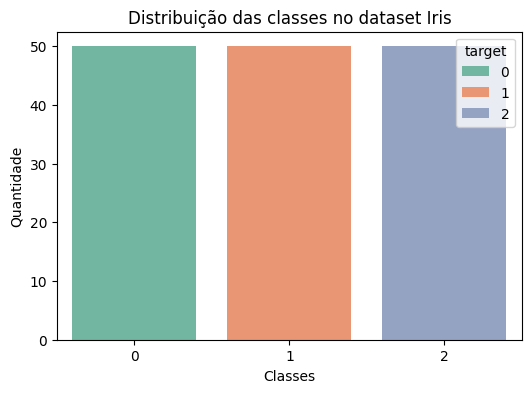

In [7]:
# Visualizando o balanceamento dos dados com cores diferentes para cada classe (usando hue)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2', hue='target')
plt.title("Distribuição das classes no dataset Iris")
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.show()

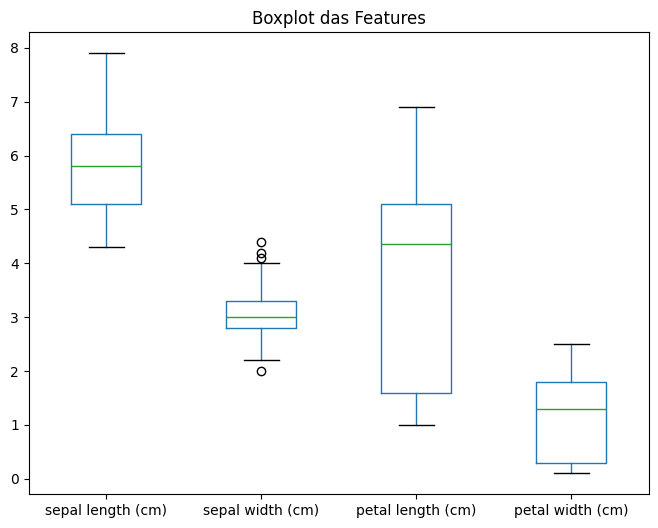

In [8]:
# Identificação de outliers usando boxplot por feature
plt.figure(figsize=(8, 6))
df_features = df.drop(columns='target')
df_features.boxplot(grid=False)
plt.title('Boxplot das Features')
plt.show()

*   **Verificar valores ausentes:** df.isnull().sum() verifica se há valores faltantes.

In [9]:
# Verificando valores nulos ou faltantes
print("\nVerificação de valores nulos:")
print(df.isnull().sum())


Verificação de valores nulos:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [10]:
# Separar dados e classes
X = df.drop(columns='target')
y = df['target']

*   **Padronização:** Utilizamos o StandardScaler para padronizar as features, ou seja, ajustamos os dados para que tenham média zero e variância 1, garantindo que todas as features tenham a mesma escala.

In [11]:
# Standardização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

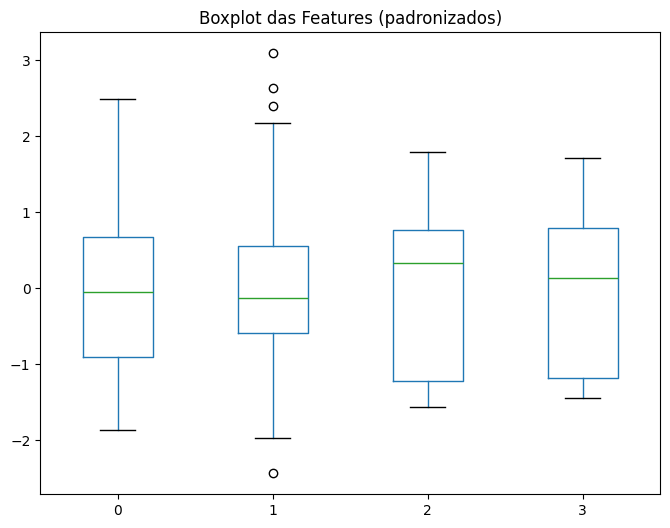

In [12]:
# Identificação de outliers usando boxplot por feature
plt.figure(figsize=(8, 6))
df_features = pd.DataFrame(X_scaled)
df_features.boxplot(grid=False)
plt.title('Boxplot das Features (padronizados)')
plt.show()

*   **Remoção de Outliers com IQR:** Usamos o método do IQR (Intervalo Interquartil) para definir limites e remover outliers. Os dados que estão fora dos limites calculados são filtrados.

### 3. Carregamento
Após as transformações, os dados estão prontos para serem usados. Neste exemplo, o carregamento ocorre quando as features padronizadas são usadas para gerar o gráfico de dispersão. Esse passo também se refere ao momento em que os dados são preparados para modelagem (como no caso do KNN).

In [13]:
# Função para remover outliers após a standardization usando o método IQR
def remove_outliers_iqr_standardized(X_scaled):
    Q1 = np.quantile(X_scaled, 0.25, axis=0)
    Q3 = np.quantile(X_scaled, 0.75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar os dados dentro dos limites inferior e superior
    mask = np.all((X_scaled >= lower_bound) & (X_scaled <= upper_bound), axis=1)
    return X_scaled[mask], y[mask]

# Aplicar a remoção de outliers
X_clean, y_clean = remove_outliers_iqr_standardized(X_scaled)

# Mostrar quantos dados foram removidos
print(f'Dados antes da remoção de outliers: {X_scaled.shape[0]}')
print(f'Dados após a remoção de outliers: {X_clean.shape[0]}')

Dados antes da remoção de outliers: 150
Dados após a remoção de outliers: 146


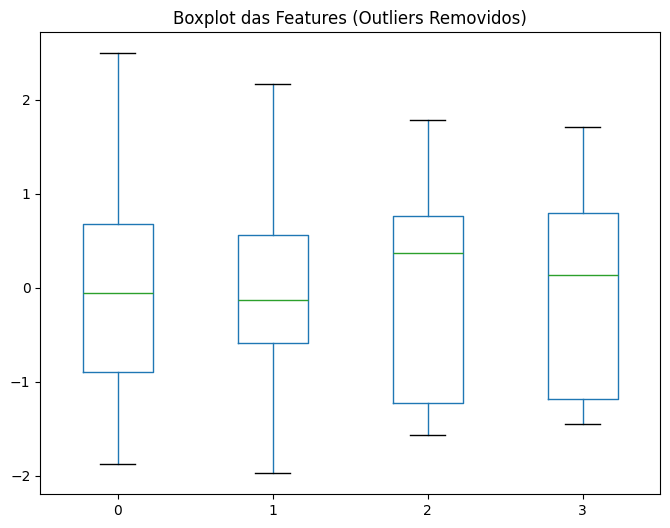

In [14]:
# Boxplot das features após a remoção de outliers
plt.figure(figsize=(8, 6))
df_features_clean = pd.DataFrame(X_clean)
df_features_clean.boxplot(grid=False)
plt.title('Boxplot das Features (Outliers Removidos)')
plt.show()

*   **Gráficos das diferentes features:** São plotados gráficos de dispersão das features com cores representando as classes.

<Figure size 800x400 with 0 Axes>

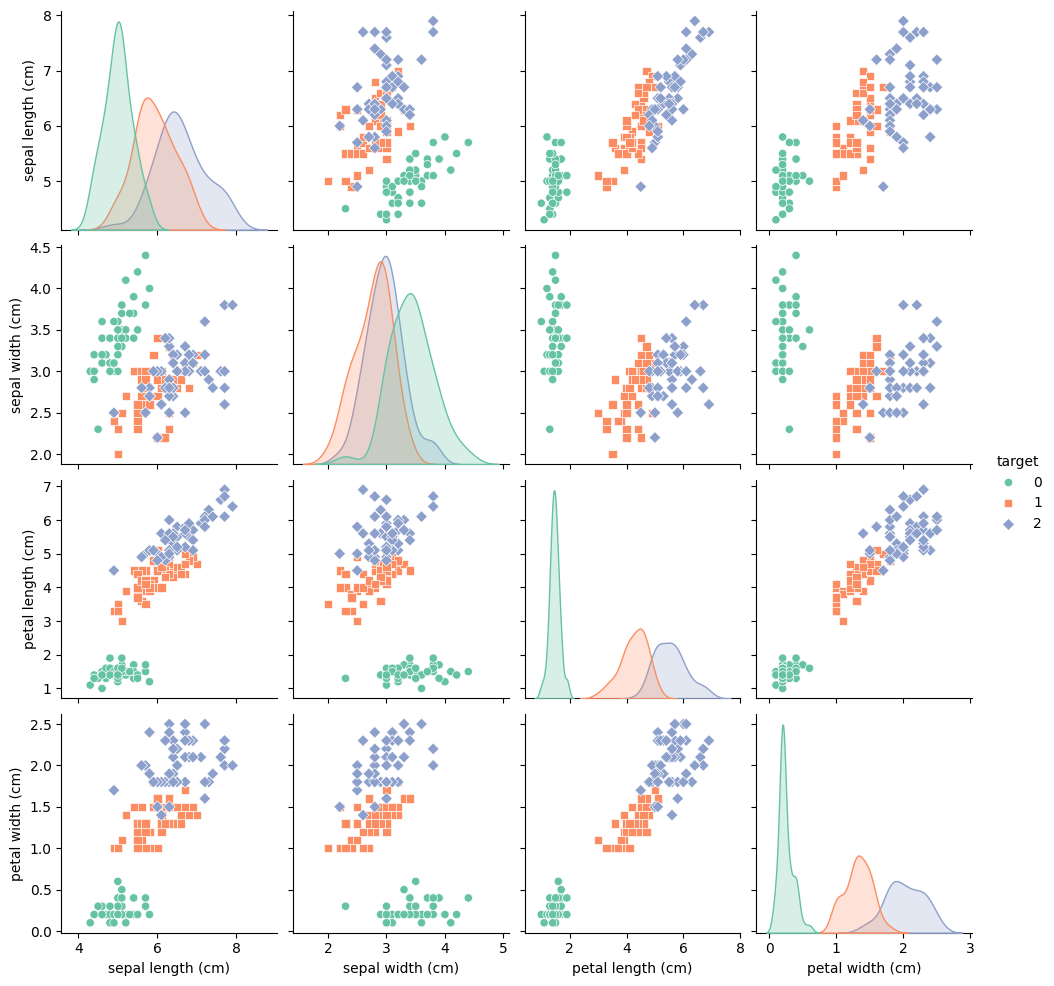

In [15]:
# Visualizando o scatter plot com diferentes classes em cores
plt.figure(figsize=(8, 4))
sns.pairplot(df, hue='target', palette='Set2', markers=["o", "s", "D"])
plt.show()

### 4. Treinamento K-fold com K=3
Usamos validação cruzada com KFold e o algoritmo KNN para realizar a **classificação**.

In [16]:
# Configuração do K-fold com k=3
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)


Fold 1:
Acurácia para o fold 1: 0.980


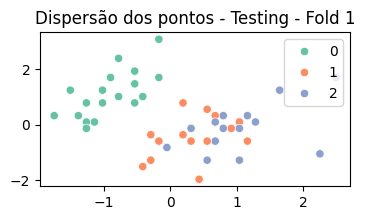


Fold 2:
Acurácia para o fold 2: 0.920


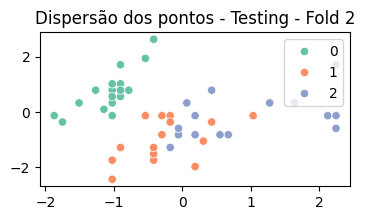


Fold 3:
Acurácia para o fold 3: 0.940


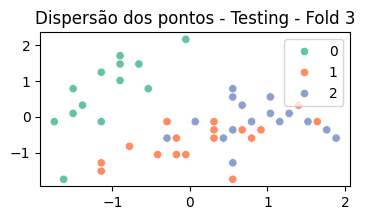


Acurácia média após 3 folds: 0.9467 com um desvio padrão de: 0.0249


In [17]:
# Iniciando o loop para o treinamento com k-fold
fold_number = 1
accuracy_per_fold = []  # Lista para armazenar a acurácia de cada fold

X_test_final, y_test_final, y_pred_final = None, None, None  # Variáveis para armazenar o último conjunto de teste

for train_index, test_index in kfold.split(X_scaled):
    print(f"\nFold {fold_number}:")

    # Separando os dados de treino e teste para o fold atual
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinando o modelo
    knn.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = knn.predict(X_test)

    # Calculando a acurácia para o fold atual
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_fold.append(accuracy)

    # Mostrando a métrica de cada fold
    print(f"Acurácia para o fold {fold_number}: {accuracy:.3f}")
    #print(classification_report(y_test, y_pred))

    # Mostrar dispersão do conjunto de testing
    plt.figure(figsize=(4, 2))
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set2')
    plt.title(f'Dispersão dos pontos - Testing - Fold {fold_number}')
    plt.show()

    # Armazenar o último conjunto de teste
    if fold_number == 3:
        X_test_final = X_test
        y_test_final = y_test
        y_pred_final = y_pred

    fold_number += 1

# Calculando a acurácia média após o loop de K-fold
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
print(f"\nAcurácia média após 3 folds: {mean_accuracy:.4f} com um desvio padrão de: {std_accuracy:.4f}")

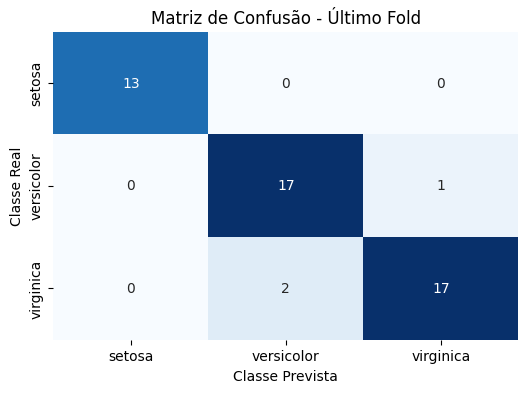

Acurácia média dos folds: 0.9467


In [18]:
# Mostrar a matriz de confusão para o último fold
if X_test_final is not None:
    cm = confusion_matrix(y_test_final, y_pred_final)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names)

    plt.title('Matriz de Confusão - Último Fold')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.show()

# Mostrar a acurácia média
print(f"Acurácia média dos folds: {mean_accuracy:.4f}")